### 필수과제1
- 로그스케일링이 무엇인지?
- 로그스케일링의 코드 예시
- 실제 iris 데이터를 가지고 로그 스케일링을 코드로 진행하고 전과 후 비교를 통해 스케일링을 한 결과 어떤 분포로 변하나 확인하기
- 데이터가 왼쪽으로 치우친 데이터의 경우는 하나의 값으로 극단적으로 분포되었다.
- 0,1,2,3,4 x축이 있는데 -> 1에 분포가 많이 되어 있으면 2,3,4에는 값이 없으면 분포가 왼쪽으로 치우쳐진다. 지수함수와 로그함수의 관계를 이해하면 아실 것

# 로그스케일링
- 왜도, 첨도 왼쪽으로 치우친 분포 
    - 왜도 : 치우침의 정도
    - 첨도 : 그래프의 뾰족함을 나타내는 수치
- 스케일링 작업을 할 때 로그함수를 이용하면 조금더 정규분포화가 잘 된다. 통상적으로 대부분 한쪽으로 치우쳐진 (왼쪽) 분포에 대해서는 로그스케일링
- 로그함수를 이용해 왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어준다.
- 반대로 로그함수로 스케일링을 하면 정상값을 돌리려면 -> 지수함수를 사용한다.
- 넘파이에서 제공되는 함수들 exp 지수함수, 로그함수 log

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 왜도, 첨도 비교

In [31]:
iris_df['sepal length (cm)'].skew()

0.3149109566369728

In [32]:
iris_df['sepal width (cm)'].skew()

0.31896566471359966

In [33]:
iris_df['petal length (cm)'].skew()

-0.27488417975101276

In [34]:
iris_df['petal width (cm)'].skew()

-0.10296674764898116

/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/538241477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_df['sepal length (cm)'], ax=ax[0,0])
/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/538241477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

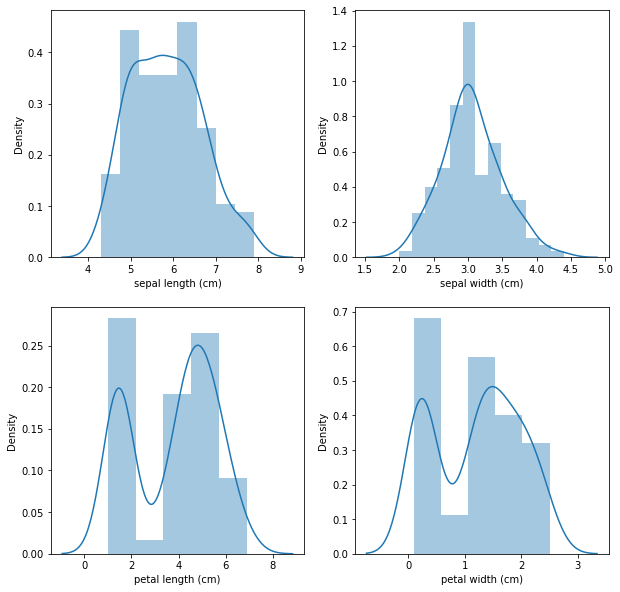

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.distplot(iris_df['sepal length (cm)'], ax=ax[0,0])
sns.distplot(iris_df['sepal width (cm)'], ax=ax[0,1])
sns.distplot(iris_df['petal length (cm)'], ax=ax[1,0])
sns.distplot(iris_df['petal width (cm)'], ax=ax[1,1])

- sepal width 제외하고 데이터가 정규분포형태를 따르지 않음
- sepal width 데이터 정규분포형태를 따르지만 첨도가 있어보임

## 로그스케일링
- 상용로그 (log10)
- 자연로그 (log)
- 자연로그+1 (log1p)

In [15]:
iris_df_log = np.log(iris_df)
iris_df_log

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438
...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909
146,1.840550,0.916291,1.609438,0.641854
147,1.871802,1.098612,1.648659,0.693147
148,1.824549,1.223775,1.686399,0.832909


/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/3826159508.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_df_log['sepal length (cm)'], ax=ax[0,0])
/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/3826159508.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

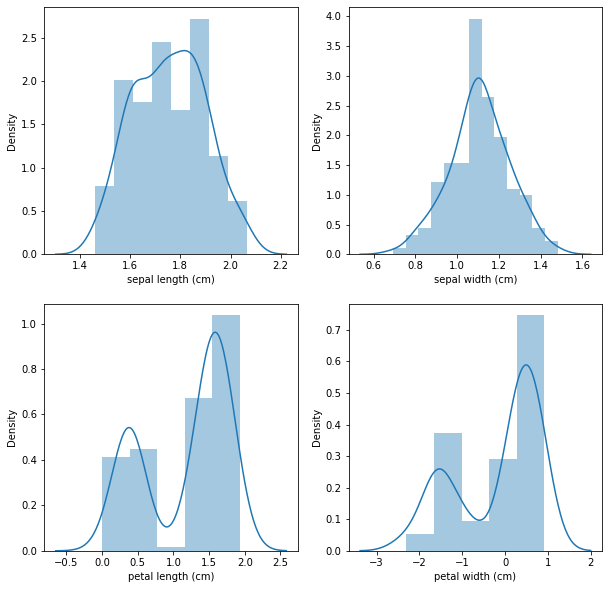

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.distplot(iris_df_log['sepal length (cm)'], ax=ax[0,0])
sns.distplot(iris_df_log['sepal width (cm)'], ax=ax[0,1])
sns.distplot(iris_df_log['petal length (cm)'], ax=ax[1,0])
sns.distplot(iris_df_log['petal width (cm)'], ax=ax[1,1])

In [17]:
iris_df_log1p = np.log1p(iris_df)
iris_df_log1p

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.808289,1.504077,0.875469,0.182322
1,1.774952,1.386294,0.875469,0.182322
2,1.740466,1.435085,0.832909,0.182322
3,1.722767,1.410987,0.916291,0.182322
4,1.791759,1.526056,0.875469,0.182322
...,...,...,...,...
145,2.041220,1.386294,1.824549,1.193922
146,1.987874,1.252763,1.791759,1.064711
147,2.014903,1.386294,1.824549,1.098612
148,1.974081,1.481605,1.856298,1.193922


- 자연로그(log)를 적용했을 때 보다 자연로그+1(log1p)의 경우가 조금 더 정규 근사화가 된 것 같다

/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/2999211697.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_df_log1p['sepal length (cm)'], ax=ax[0,0])
/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_893/2999211697.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

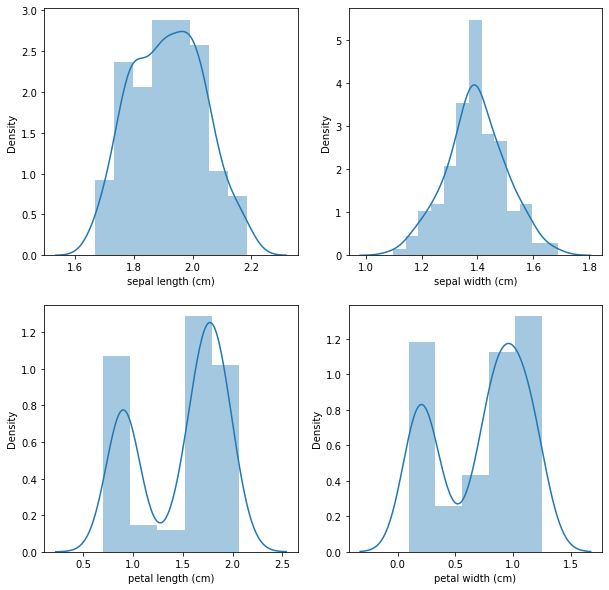

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.distplot(iris_df_log1p['sepal length (cm)'], ax=ax[0,0])
sns.distplot(iris_df_log1p['sepal width (cm)'], ax=ax[0,1])
sns.distplot(iris_df_log1p['petal length (cm)'], ax=ax[1,0])
sns.distplot(iris_df_log1p['petal width (cm)'], ax=ax[1,1])

## 로그스케일링 된 데이터 -> 원본데이터로

In [36]:
re_iris_df_log = np.exp(iris_df_log)
re_iris_df_log

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
re_iris_df_log1p = np.expm1(iris_df_log1p)
re_iris_df_log1p

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
